In [1]:
from transporter_env import TransportEnv

env = TransportEnv(max_capacity=10)#size=12, transporters_hubs=(27, 116), horizon=128)

transporter 1 total profit 188.0
transporter 2 total profit 378.0


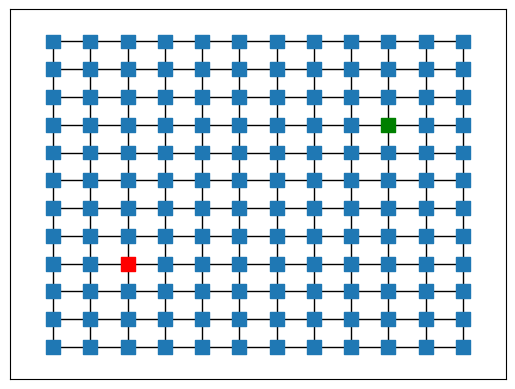

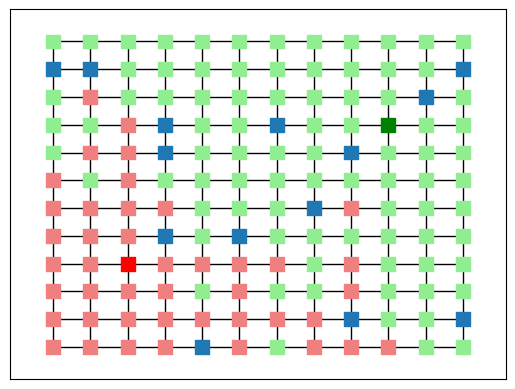

In [2]:
rewards = []
env.reset()
env.render()
done = False
while not done:
    actions = {
        i : 0
        for i in range(2)
    }
    _, r, d, _ = env.step(actions)
    done = d[0]
    rewards.append(r)
env.render()
t1_r = [r[0] for r in rewards]
t2_r = [r[1] for r in rewards]
print('transporter 1 total profit', sum(t1_r))
print('transporter 2 total profit', sum(t2_r))

transporter 1 total profit 623.0
transporter 2 total profit 34.0


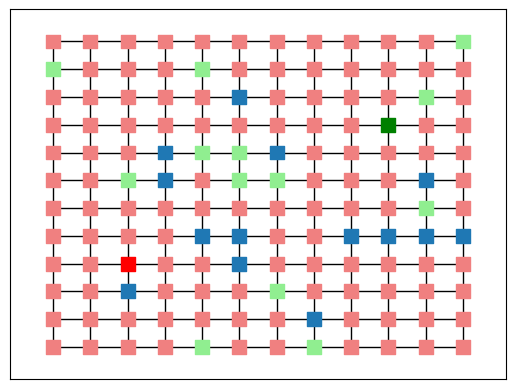

In [3]:
rewards = []
env.reset()
done = False
while not done:
    actions = {
        i : 0
        for i in range(2)
    }
    actions [1] = env.action_space.sample()
    _, r, d, _ = env.step(actions)
    done = d[0]
    rewards.append(r)
env.render()
t1_r = [r[0] for r in rewards]
t2_r = [r[1] for r in rewards]
print('transporter 1 total profit', sum(t1_r))
print('transporter 2 total profit', sum(t2_r))

In [4]:
import ray.rllib


ModuleNotFoundError: No module named 'ray'